# Test of FiPy

First let us install the FiPy package using pip and then import the necessary functions that we need to run FiPy.

In [29]:
!pip install fipy

from fipy import CellVariable, Grid1D, DiffusionTerm, ExponentialConvectionTerm, DefaultAsymmetricSolver, Viewer
from fipy.tools import numerix



ERROR: (Gentoo) Please run pip with the --user option to avoid breaking python-exec


\begin{align*}
\frac{d}{dx} D \frac{d\phi}{dx} - u\frac{d\phi}{dx}
+ S(x) &= 0
\end{align*}

In [12]:
diffCoeff = 1.
convCoeff = (10.,)
sourceCoeff = 1.



# define the mesh
nx = 1000
L = 10.
mesh = Grid1D(dx=L / 1000, nx=nx)
x_mesh = mesh.cellCenters[0]

# create the variable
var = CellVariable(name="variable", mesh=mesh)




# boundary conditions
valueLeft = 0.
valueRight = 1.
var.constrain(valueLeft, mesh.facesLeft)
var.constrain(valueRight, mesh.facesRight)


# solve the differential equation

eq = (DiffusionTerm(coeff=diffCoeff)
      - ExponentialConvectionTerm(coeff=convCoeff)
      + sourceCoeff)
eq.solve(var=var,
         solver=DefaultAsymmetricSolver(tolerance=1.e-15, iterations=10000))


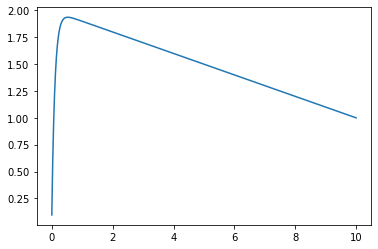

In [14]:
import pylab as plt


plt.plot(list(x_mesh), list(var.value))

## Two dimensional convection-diffusion equation

Now let's solve the steady state convection-diffusion equation for a two dimensional system.  We consider a rectanglar system with width $W$ and height $H$.


The differential equation is given by:
\begin{align*}
\nabla \cdot (D\nabla \phi) - \nabla\cdot({\bf u}\phi) + S &= 0
\end{align*}

For the boundary condition, we hold the value of $\phi$ to a constant value along the top, bottom, left, and right edges of the system.



In [27]:
from fipy import Grid2D

diffCoeff = 1.
convCoeff = (1.,1)   # u
sourceCoeff = 1.



# define the mesh
nx = 20
ny = 20
W = 10.0
H = 10.0
mesh = Grid2D(dx=W/nx, nx=nx, dy=H/ny, ny=ny)
x_mesh = mesh.cellCenters

# create the variable
var = CellVariable(name="variable", mesh=mesh)




# boundary conditions
valueLeft = 0.
valueRight = 1.
valueTop = 1.0
valueBottom = 1.0
var.constrain(valueLeft, mesh.facesLeft)
var.constrain(valueRight, mesh.facesRight)
var.constrain(valueLeft, mesh.facesTop)
var.constrain(valueRight, mesh.facesBottom)

# solve the differential equation

eq = (DiffusionTerm(coeff=diffCoeff)
      - ExponentialConvectionTerm(coeff=convCoeff)
      + sourceCoeff)

eq.solve(var=var,
         solver=DefaultAsymmetricSolver(tolerance=1.e-15, iterations=10000))


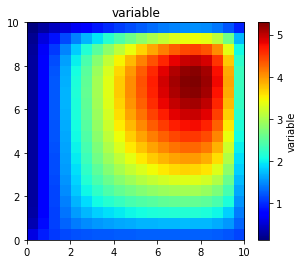

In [28]:
viewer = Viewer(vars=var)
#viewer.plot()